In [288]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [289]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine=[train,test]

In [290]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [292]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [293]:
#train.isnull()
train['Cabin'][0:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [294]:
s=pd.Series(['a','b',1,2])
s

0    a
1    b
2    1
3    2
dtype: object

In [295]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [296]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Wick, Mrs. George Dennick (Mary Hitchcock)",male,1601,G6,S
freq,1,577,7,4,644


In [297]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Wick, Mrs. George Dennick (Mary Hitchcock)",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [298]:
train[['Survived','Pclass']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [299]:
train[['Survived','Sex']].groupby(['Sex'],as_index=False).mean().sort_values(by = 'Sex',ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [300]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [301]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


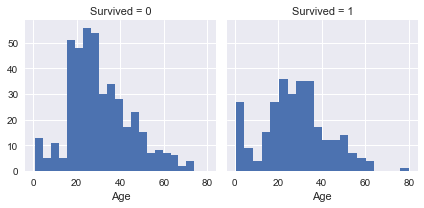

In [302]:
hist1 = sns.FacetGrid(data = train, col = 'Survived')
hist1.map(plt.hist,'Age',bins=20)
plt.show()

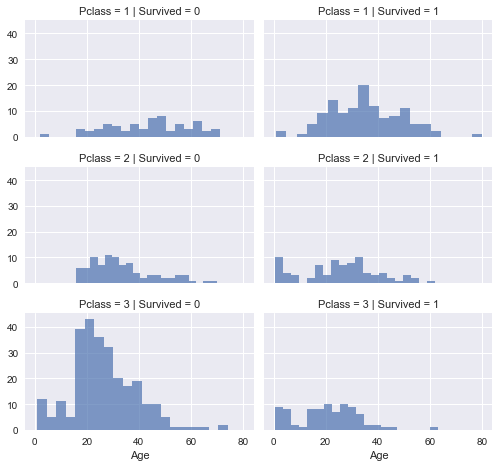

In [303]:
hist2 = sns.FacetGrid(data = train, col='Survived',row='Pclass',size=2.2,aspect=1.6 )
hist2.map(plt.hist,'Age',alpha=0.7,bins=20)
plt.show()

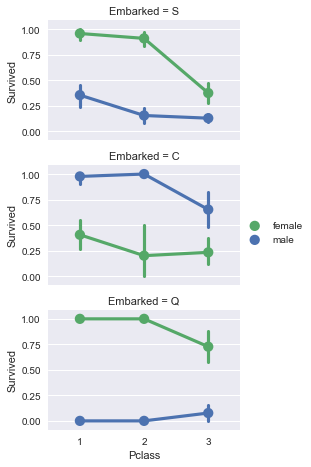

In [304]:
line1 = sns.FacetGrid(data=train, row='Embarked',size=2.2, aspect=1.6)
line1.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
line1.add_legend()
plt.show()

In [305]:
# Dropping Features
print(train.shape,test.shape)

(891, 12) (418, 11)


In [316]:
train_drop = train.drop(['Ticket','Cabin'],axis=1)
test_drop = test.drop(['Ticket','Cabin'],axis=1)
combine=[train_drop,test_drop]
train_drop.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [317]:
# We consider title has relation with survival
# We'll extract the titles out from name
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [318]:
combine[0][0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [312]:
combine[1][0:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [320]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [319]:
train_drop.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [321]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_drop[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [322]:
combine[0][0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [323]:
combine[1][0:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [325]:
# Convert categorical titles to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_drop.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [433]:
# Now that we've extracted the titles, we can drop the "Name" and "PassengerID" feature
train_drop2=train_drop.drop(["Name","PassengerId"],axis=1)
test_drop2=test_drop.drop(["Name"],axis=1)
combine = [train_drop2,test_drop2]

In [434]:
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [435]:
# Convert "sex" into numeric
sex_mapping = {'male':0,'female':1}
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map(sex_mapping).astype(int)
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [436]:
type(train_drop2)
type(combine)

list

In [437]:
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [438]:
guess_ages = np.zeros((2,3))

In [439]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_data = dataset[(dataset['Sex']==i)&(dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess = guess_data.median()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

In [440]:
combine[0][(combine[0]['Sex']==1)&(combine[0]['Pclass']==1)][0:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,1,38.0,1,0,71.2833,C,3
3,1,1,1,35.0,1,0,53.1000,S,3
11,1,1,1,58.0,0,0,26.5500,S,2
31,1,1,1,NaN,1,0,146.5208,C,3
52,1,1,1,49.0,1,0,76.7292,C,3


In [441]:
guess_ages

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [442]:
# Fill the NA ages with median
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset['Age'].isnull())&(dataset['Sex']==i)&(dataset['Pclass']==j+1),'Age']=guess_ages[i,j]
    dataset['Age']=dataset['Age'].astype(int)

In [443]:
combine[0][(combine[0]['Sex']==1)&(combine[0]['Pclass']==1)][0:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,1,38,1,0,71.2833,C,3
3,1,1,1,35,1,0,53.1000,S,3
11,1,1,1,58,0,0,26.5500,S,2
31,1,1,1,41,1,0,146.5208,C,3
52,1,1,1,49,1,0,76.7292,C,3


In [444]:
train_drop2[(train_drop2['Sex']==1)&(train_drop2['Pclass']==1)][0:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
1,1,1,1,38,1,0,71.2833,C,3
3,1,1,1,35,1,0,53.1000,S,3
11,1,1,1,58,0,0,26.5500,S,2
31,1,1,1,41,1,0,146.5208,C,3
52,1,1,1,49,1,0,76.7292,C,3


In [445]:
# Create AgeBand and find correlations with Survived
train_drop2['AgeBand']=pd.cut(train_drop2['Age'],5)
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,38,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,26,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,35,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,35,0,0,8.0500,S,1,"(32, 48]"


In [446]:
train_drop2[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=False)

,AgeBand,Survived
4,"(64, 80]",0.090909
3,"(48, 64]",0.434783
2,"(32, 48]",0.412037
1,"(16, 32]",0.337374
0,"(-0.08, 16]",0.550000


In [447]:
# replace AgeBands with ordinals
for dataset in combine:
    dataset.loc[dataset["Age"]<=16,'Age']=0
    dataset.loc[(dataset["Age"]<=32)&(dataset["Age"]>16),'Age']=1
    dataset.loc[(dataset["Age"]<=48)&(dataset["Age"]>32),'Age']=2
    dataset.loc[(dataset["Age"]<=64)&(dataset["Age"]>48),'Age']=3
    dataset.loc[(dataset["Age"]<=80)&(dataset["Age"]>64),'Age']=4
    

In [448]:
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [449]:
test_drop2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [450]:
# Drop the AgeBand feature from train&test dataset
train_drop2=train_drop2.drop(['AgeBand'],axis=1)
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [452]:
test_drop2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3


In [451]:
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16, 32]"
1,1,1,1,2,1,0,71.2833,C,3,"(32, 48]"
2,1,3,1,1,0,0,7.9250,S,2,"(16, 32]"
3,1,1,1,2,1,0,53.1000,S,3,"(32, 48]"
4,0,3,0,2,0,0,8.0500,S,1,"(32, 48]"


In [453]:
combine=[train_drop2,test_drop2]

In [454]:
# Create new feature "FamilyMember" based on "SibSp" and "Parch"
for dataset in combine:
    dataset['FamilyMember']=dataset['SibSp']+dataset['Parch']+1

In [457]:
aa = [1,2]
bb = [3,4]
cc = [aa,bb]

In [ ]:
aa 

In [455]:
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyMember
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1


In [456]:
test_drop2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyMember
0,892,3,0,2,0,0,7.8292,Q,1,1
1,893,3,1,2,1,0,7.0000,S,3,2
2,894,2,0,3,0,0,9.6875,Q,1,1
3,895,3,0,1,0,0,8.6625,S,1,1
4,896,3,1,1,1,1,12.2875,S,3,3


In [463]:
combine[1].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyMember
0,892,3,0,2,0,0,7.8292,Q,1,1
1,893,3,1,2,1,0,7.0000,S,3,2
2,894,2,0,3,0,0,9.6875,Q,1,1
3,895,3,0,1,0,0,8.6625,S,1,1
4,896,3,1,1,1,1,12.2875,S,3,3


In [462]:
train_drop2[['FamilyMember','Survived']].groupby(['FamilyMember'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilyMember,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [466]:
# Create 'isAlone' based on 'FamilyMember' 
for dataset in combine:
    dataset['IsAlone']=(dataset['FamilyMember']>1)*1

In [467]:
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyMember,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,1
1,1,1,1,2,1,0,71.2833,C,3,2,1
2,1,3,1,1,0,0,7.9250,S,2,1,0
3,1,1,1,2,1,0,53.1000,S,3,2,1
4,0,3,0,2,0,0,8.0500,S,1,1,0


In [472]:
train_drop3 = train_drop2.drop(['FamilyMember','Parch','SibSp'],axis=1)
test_drop3 = test_drop2.drop(['FamilyMember','Parch','SibSp'],axis=1)

In [473]:
combine=[train_drop3,test_drop3]

In [474]:
train_drop3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,1
1,1,1,1,2,71.2833,C,3,1
2,1,3,1,1,7.9250,S,2,0
3,1,1,1,2,53.1000,S,3,1
4,0,3,0,2,8.0500,S,1,0


In [475]:
test_drop3.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,Q,1,0
1,893,3,1,2,7.0000,S,3,1
2,894,2,0,3,9.6875,Q,1,0
3,895,3,0,1,8.6625,S,1,0
4,896,3,1,1,12.2875,S,3,1


In [479]:
# Fill NA of 'Embarked' with mode, there are 2 missing values
train_drop3['Embarked'].describe()
sum(train_drop3['Embarked'].isnull())

2

In [488]:
# Find the mode
embark_mode = train_drop3['Embarked'].dropna().mode()[0]
embark_mode

'S'

In [489]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(embark_mode)

In [491]:
train_drop3[['Survived','Embarked']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [493]:
embarked_mapping = {'C':2,'Q':1,'S':0}
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping).astype(int)

In [494]:
train_drop3[0:10]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,1
1,1,1,1,2,71.2833,2,3,1
2,1,3,1,1,7.9250,0,2,0
3,1,1,1,2,53.1000,0,3,1
4,0,3,0,2,8.0500,0,1,0
5,0,3,0,1,8.4583,1,1,0
6,0,1,0,3,51.8625,0,1,0
7,0,3,0,0,21.0750,0,4,1
8,1,3,1,1,11.1333,0,3,1
9,1,2,1,0,30.0708,2,3,1


In [512]:
train_drop4=train_drop3.copy()
test_drop4=test_drop3.copy()

In [513]:
one_hot = pd.DataFrame(columns=['Pclass1','Pclass2','Pclass3','Title1','Title2','Title3','Title4'])

In [514]:
one_hot

,Pclass1,Pclass2,Pclass3,Title1,Title2,Title3,Title4


In [515]:
train_drop4 = pd.concat([train_drop4,one_hot])
test_drop4 = pd.concat([test_drop4,one_hot])

In [517]:
test_drop4.head()

,Age,Embarked,Fare,IsAlone,PassengerId,Pclass,Pclass1,Pclass2,Pclass3,Sex,Title,Title1,Title2,Title3,Title4
0,2.0,1.0,7.8292,0.0,892.0,3.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
1,2.0,0.0,7.0000,1.0,893.0,3.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN
2,3.0,1.0,9.6875,0.0,894.0,2.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
3,1.0,0.0,8.6625,0.0,895.0,3.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
4,1.0,0.0,12.2875,1.0,896.0,3.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN


In [525]:
train_drop4.loc[train_drop4['Pclass']==1,'Pclass1']=1
train_drop4.loc[train_drop4['Pclass']==2,'Pclass2']=1
train_drop4.loc[train_drop4['Pclass']==3,'Pclass3']=1
train_drop4.loc[train_drop4['Title']==1,'Title1']=1
train_drop4.loc[train_drop4['Title']==2,'Title2']=1
train_drop4.loc[train_drop4['Title']==3,'Title3']=1
train_drop4.loc[train_drop4['Title']==4,'Title4']=1
train_drop4[0:10]

,Age,Embarked,Fare,IsAlone,Pclass,Pclass1,Pclass2,Pclass3,Sex,Survived,Title,Title1,Title2,Title3,Title4
0,1.0,0.0,7.2500,1.0,3.0,NaN,NaN,1,0.0,0.0,1.0,1,NaN,NaN,NaN
1,2.0,2.0,71.2833,1.0,1.0,1,NaN,NaN,1.0,1.0,3.0,NaN,NaN,1,NaN
2,1.0,0.0,7.9250,0.0,3.0,NaN,NaN,1,1.0,1.0,2.0,NaN,1,NaN,NaN
3,2.0,0.0,53.1000,1.0,1.0,1,NaN,NaN,1.0,1.0,3.0,NaN,NaN,1,NaN
4,2.0,0.0,8.0500,0.0,3.0,NaN,NaN,1,0.0,0.0,1.0,1,NaN,NaN,NaN
5,1.0,1.0,8.4583,0.0,3.0,NaN,NaN,1,0.0,0.0,1.0,1,NaN,NaN,NaN
6,3.0,0.0,51.8625,0.0,1.0,1,NaN,NaN,0.0,0.0,1.0,1,NaN,NaN,NaN
7,0.0,0.0,21.0750,1.0,3.0,NaN,NaN,1,0.0,0.0,4.0,NaN,NaN,NaN,1
8,1.0,0.0,11.1333,1.0,3.0,NaN,NaN,1,1.0,1.0,3.0,NaN,NaN,1,NaN
9,0.0,2.0,30.0708,1.0,2.0,NaN,1,NaN,1.0,1.0,3.0,NaN,NaN,1,NaN


In [526]:
train_drop4.fillna(0)

,Age,Embarked,Fare,IsAlone,Pclass,Pclass1,Pclass2,Pclass3,Sex,Survived,Title,Title1,Title2,Title3,Title4
0,1.0,0.0,7.2500,1.0,3.0,0,0,1,0.0,0.0,1.0,1,0,0,0
1,2.0,2.0,71.2833,1.0,1.0,1,0,0,1.0,1.0,3.0,0,0,1,0
2,1.0,0.0,7.9250,0.0,3.0,0,0,1,1.0,1.0,2.0,0,1,0,0
3,2.0,0.0,53.1000,1.0,1.0,1,0,0,1.0,1.0,3.0,0,0,1,0
4,2.0,0.0,8.0500,0.0,3.0,0,0,1,0.0,0.0,1.0,1,0,0,0
5,1.0,1.0,8.4583,0.0,3.0,0,0,1,0.0,0.0,1.0,1,0,0,0
6,3.0,0.0,51.8625,0.0,1.0,1,0,0,0.0,0.0,1.0,1,0,0,0
7,0.0,0.0,21.0750,1.0,3.0,0,0,1,0.0,0.0,4.0,0,0,0,1
8,1.0,0.0,11.1333,1.0,3.0,0,0,1,1.0,1.0,3.0,0,0,1,0
9,0.0,2.0,30.0708,1.0,2.0,0,1,0,1.0,1.0,3.0,0,0,1,0


In [527]:
train_drop4['Pclass2']=train_drop4[(train_drop4['Pclass']==2)*1]
train_drop4['Pclass3']=train_drop4[(train_drop4['Pclass']==3)*1]
train_drop4['Title1']=train_drop4[(train_drop4['Title']==1)*1]
train_drop4['Title2']=train_drop4[(train_drop4['Title']==2)*1]
train_drop4['Title3']=train_drop4[(train_drop4['Title']==3)*1]
train_drop4['Title4']=train_drop4[(train_drop4['Title']==4)*1]

In [530]:
sum(train_drop2.Age.isnull())

0

In [531]:
train_drop2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilyMember,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,1
1,1,1,1,2,1,0,71.2833,C,3,2,1
2,1,3,1,1,0,0,7.9250,S,2,1,0
3,1,1,1,2,1,0,53.1000,S,3,2,1
4,0,3,0,2,0,0,8.0500,S,1,1,0
